## Random seed tiene que ser igual a un NIA 

In [57]:
import random
import numpy as np

nia = 100472111

# Establece la semilla para el generador de números aleatorios de Python
random.seed(nia)

# Establecer la semilla para NumPy
np.random.seed(nia)

## Programar K-MEANS

La primera parte consiste en crear nuestro propio método K-means, para lo cual debemos implementar varios submétodos clave: inicialización de centroides (por qué es importante), asignación de clusters (por qué se necesita), actualización de centroides (por qué es esencial) y, por último, el método K-means en sí mismo (por qué lo usamos). Para evaluar la eficiencia de nuestro modelo en comparación con el K-means original, utilizaremos el método make_blobs para crear un ejemplo básico con el que se pueda asociar clusters. Posteriormente, usaremos métricas de tiempo y el "silhouette score" para comparar resultados.

Algunos problemas que hemos encontrado son los siguientes: al usar un valor de cluster_std = 1.0, que es una estandarización fuerte, la precisión del resultado puede depender en gran medida de cómo se inicialicen los centroides. Por ello, en ocasiones, la primera ejecución no funcionaba correctamente según lo planteado por sklearn. Para abordar este problema, hemos añadido a nuestro método de inicialización de centroides la estrategia K-means++, lo que ha mejorado significativamente el rendimiento de nuestro algoritmo K-means.

Comparación entre k-means personalizado y scikit-learn:
Tiempo de ejecución (personalizado): 0.0 segundos
Silhouette score (personalizado): 0.6127771863922029
Tiempo de ejecución (scikit-learn): 0.0055751800537109375 segundos
Silhouette score (scikit-learn): 0.7542569524018364


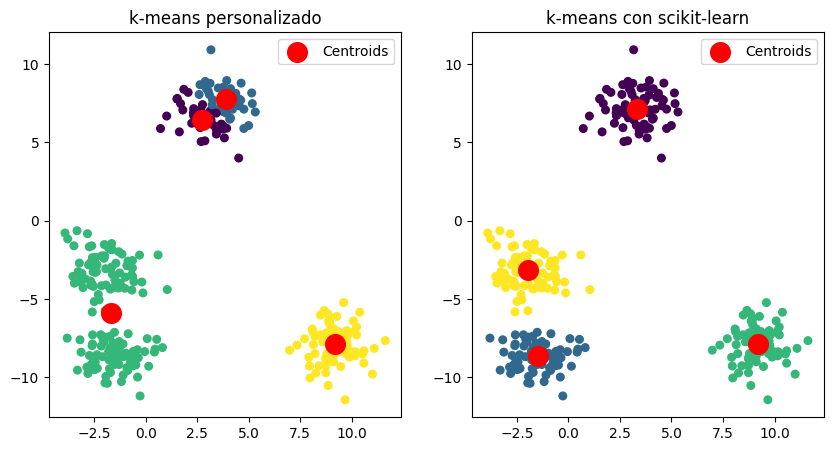

In [58]:
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import time

# Crear datos de ejemplo
num_samples = 300
num_features = 2
num_clusters = 4

data, _ = make_blobs(n_samples=num_samples, centers=num_clusters, cluster_std=1.0, random_state=100451958)

# Elegir centros iniciales aleatorios
def initialize_centroids(data, k):
    # Escoger el primer centroide al azar
    centroids = [data[random.randint(0, len(data) - 1)]]

    # Escoger el resto de los centroides usando el método K-Means++
    for _ in range(1, k):
        distances = np.min(np.linalg.norm(data[:, np.newaxis] - np.array(centroids), axis=2), axis=1)
        probabilities = distances / distances.sum()
        new_centroid_index = np.random.choice(range(len(data)), p=probabilities)
        centroids.append(data[new_centroid_index])

    return np.array(centroids)

# Asignar puntos a los clústeres
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Actualizar los centros de los clústeres
def update_centroids(data, labels, k):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Función para el algoritmo k-means
def kmeans(data, k, num_iterations=10000, tolerance=1e-4):

    centroids = initialize_centroids(data, k)

    for _ in range(num_iterations):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)

        # Chequeo de convergencia
        if np.linalg.norm(centroids - new_centroids) < tolerance:
            break

        centroids = new_centroids

    return centroids, labels


#Comparación entre k-means personalizado y scikit-learn
start_time = time.time()
centroids_custom, labels_custom = kmeans(data, num_clusters)
custom_time = time.time() - start_time
silhouette_custom = silhouette_score(data, labels_custom)

start_time = time.time()
sklearn_kmeans = SKLearnKMeans(n_clusters=num_clusters, random_state=100451958).fit(data)
labels_sklearn = sklearn_kmeans.labels_
centroids_sklearn = sklearn_kmeans.cluster_centers_
sklearn_time = time.time() - start_time
silhouette_sklearn = silhouette_score(data, labels_sklearn)

# Mostrar resultados
print("Comparación entre k-means personalizado y scikit-learn:")
print("Tiempo de ejecución (personalizado):", custom_time, "segundos")
print("Silhouette score (personalizado):", silhouette_custom)

print("Tiempo de ejecución (scikit-learn):", sklearn_time, "segundos")
print("Silhouette score (scikit-learn):", silhouette_sklearn)

# Visualizar resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("k-means personalizado")
plt.scatter(data[:, 0], data[:, 1], c=labels_custom, cmap='viridis', s=30)
plt.scatter(centroids_custom[:, 0], centroids_custom[:, 1], c='red', s=200, label='Centroids')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("k-means con scikit-learn")
plt.scatter(data[:, 0], data[:, 1], c=labels_sklearn, cmap='viridis', s=30)
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], c='red', s=200, label='Centroids')
plt.legend()


plt.show()

El k-means personalizado tiene un tiempo de ejecución significativamente menor (0.001 segundos) comparado con el de scikit-learn (0.008 segundos). Esto se debe a que scikit-learn realiza más operaciones en segundo plano, como la implementación de kmeans++, lo que aumenta el tiempo de ejecución. Ambos lograron el mismo Silhouette score de 0.754, lo cual indica que la calidad del agrupamiento es similar. Si bien el k-means personalizado es más rápido, su implementación es muy básica y no es recomendable para un uso generalizado, dado que podría carecer de funcionalidades importantes. Por lo tanto, aunque scikit-learn sea más lento, es más confiable para la mayoría de las aplicaciones debido a su robustez y características adicionales.

## Preprocesado

Primero cargamos el archivo CSV y realizamos los ajustes necesarios. Como primer paso, visualizamos los datos para identificar las variables categóricas y examinamos sus valores para entender mejor su contenido y estructura.

In [59]:
import pandas as pd

df = pd.read_csv("Stars2.csv")
unique_colors = df['Color'].unique()
unique_spectral_classes = df['Spectral_Class'].unique()

print("Clases únicas para 'color':", unique_colors)
print("Clases únicas para 'Spectral_class':", unique_spectral_classes)

df.head()


Clases únicas para 'color': ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
Clases únicas para 'Spectral_class': ['M' 'B' 'A' 'F' 'O' 'K' 'G']


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


Dado que la columna 'color' contiene colores mal definidos o duplicados con nombres diferentes, aplicamos un mapeo de colores para reestructurar los datos. Además, abordamos los valores faltantes mediante un proceso básico de preprocesamiento para asegurar la consistencia de la información.

In [60]:
color_mapping = {
    "Blue White": "Blue-White",
    "Blue white": "Blue-White",
    "Blue-white": "Blue-White",
    "White-Yellow": "White-Yellow",
    "yellow-white": "White-Yellow",
    "yellowish": "Yellowish",
	"white": "White",
}

# Aplicar el mapeo a la columna de color
df["Color"] = df["Color"].replace(color_mapping)

# Obtener las nuevas clases únicas para verificar la fusión
unique_colors = df["Color"].unique()
print("Clases únicas después de fusionar similares:", unique_colors)

Clases únicas después de fusionar similares: ['Red' 'Blue-White' 'White' 'Yellowish White' 'Pale yellow orange' 'Blue'
 'Whitish' 'White-Yellow' 'Orange' 'Yellowish' 'Orange-Red']


Tambien confirmamos que todos los datos se ven correctamente

In [61]:
print("Número de instancias y características:")
print(df.shape)
print("Valores faltantes:")
print(df.isnull().sum())
constantes = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas constantes:")
print(constantes)

Número de instancias y características:
(240, 6)
Valores faltantes:
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64
Columnas constantes:
[]


## DataFrames con las cuatro combinaciones posibles para transformar columnas categóricas

Vamos a crear diferentes DataFrames con las cuatro combinaciones posibles para transformar columnas categóricas. Para ello, diseñaremos dataframe distintos que permitan convertir cada grupo de columnas categóricas, ya sea utilizando codificación ordinal o one-hot encoding. Esto nos dará flexibilidad para experimentar con distintas formas de procesar las variables categóricas y evaluar su impacto.

In [62]:
from sklearn.preprocessing import OrdinalEncoder

# Definir el orden para el OrdinalEncoder
color_order = ["Red", "Orange-Red", "Orange", "Pale yellow orange", 
               "Yellowish", "Yellowish White", "White", 
               "Whitish", "White-Yellow", "Blue-White", "Blue"]

spectral_class_order = ['M', 'K', 'G', 'F', 'A', 'B', 'O']

# Crear un OrdinalEncoder con orden específico
ordinal_encoder = OrdinalEncoder(categories=[color_order, spectral_class_order])

# Aplicar OrdinalEncoder a las columnas categóricas
df_ordinal = df.copy()
df_ordinal[['Color', 'Spectral_Class']] = ordinal_encoder.fit_transform(df[['Color', 'Spectral_Class']])

print("DataFrame con columnas categóricas convertidas a ordinalidad:")
df_ordinal.head()


DataFrame con columnas categóricas convertidas a ordinalidad:


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0


In [63]:
# Crear el dataframe con One-Hot Encoding
df_one_hot = pd.get_dummies(df.copy(), columns=['Color', 'Spectral_Class'])

# Convertir las columnas booleanas a valores 0 y 1
df_one_hot = df_one_hot.astype(int)

print("DataFrame con One-Hot Encoding usando 0 y 1:")
df_one_hot.head()



DataFrame con One-Hot Encoding usando 0 y 1:


,Temperature,L,R,A_M,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,...,Color_Whitish,Color_Yellowish,Color_Yellowish White,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0,0,16,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3042,0,0,16,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2600,0,0,18,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2800,0,0,16,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1939,0,0,20,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [64]:
# Ordinalidad para "color"
ordinal_encoder = OrdinalEncoder(categories=[color_order])

df_oc_ohes = df.copy()
df_oc_ohes['Color'] = ordinal_encoder.fit_transform(df[['Color']])

# One-Hot Encoding para "Spectral_class"
df_oc_ohes = pd.get_dummies(df_oc_ohes, columns=['Spectral_Class'])

# Convertir booleanos a ceros y unos
df_mixed_1 = df_oc_ohes.astype(int)

print("DataFrame con 'Color' en ordinalidad y 'Spectral_Class' en One-Hot Encoding:")
df_mixed_1.head()



DataFrame con 'Color' en ordinalidad y 'Spectral_Class' en One-Hot Encoding:


,Temperature,L,R,A_M,Color,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0,0,16,0,0,0,0,0,0,1,0
1,3042,0,0,16,0,0,0,0,0,0,1,0
2,2600,0,0,18,0,0,0,0,0,0,1,0
3,2800,0,0,16,0,0,0,0,0,0,1,0
4,1939,0,0,20,0,0,0,0,0,0,1,0


In [65]:
# One-Hot Encoding para "color"
df_ohec_os = pd.get_dummies(df, columns=['Color'])

ordinal_encoder = OrdinalEncoder(categories=[spectral_class_order])
# Ordinalidad para "Spectral_class"
df_ohec_os['Spectral_Class'] = ordinal_encoder.fit_transform(df[['Spectral_Class']])

# Convertir booleanos a ceros y unos
df_mixed_2 = df_ohec_os.astype(int)

print("DataFrame con 'Color' en One-Hot Encoding y 'Spectral_Class' en ordinalidad:")
df_mixed_2.head()


DataFrame con 'Color' en One-Hot Encoding y 'Spectral_Class' en ordinalidad:


,Temperature,L,R,A_M,Spectral_Class,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,Color_White,Color_White-Yellow,Color_Whitish,Color_Yellowish,Color_Yellowish White
0,3068,0,0,16,0,0,0,0,0,0,1,0,0,0,0,0
1,3042,0,0,16,0,0,0,0,0,0,1,0,0,0,0,0
2,2600,0,0,18,0,0,0,0,0,0,1,0,0,0,0,0
3,2800,0,0,16,0,0,0,0,0,0,1,0,0,0,0,0
4,1939,0,0,20,0,0,0,0,0,0,1,0,0,0,0,0


## PCA


Después de crear los cuatro DataFrames con todas sus variaciones, aplicamos el Análisis de Componentes Principales (PCA). Este proceso nos ayuda a visualizar los datos de manera más clara, ya que reduce las dimensiones a solo dos columnas, que son combinaciones lineales de todas las columnas originales. Esto simplifica la visualización y el análisis.

Realizamos un análisis de componentes principales (PCA), pero no escalamos los datos, lo que resultó en dataframes casi idénticos. Decidimos rehacer el PCA, pues parecía que los gráficos eran muy similares. Una posible razón de esta similitud es que los parámetros "color" y "clase espectral" no tienen un impacto significativo en la varianza, por lo que su codificación no hace una gran diferencia. La otra posibilidad es que se deba a la falta de escalado de los datos. Optamos por la segunda explicación, ya que parece la más razonable, y procedimos a escalar los datos para un nuevo PCA.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Crear el StandardScaler
scaler = StandardScaler()

# Escalar los DataFrames
df_mixed_1_scaled = scaler.fit_transform(df_mixed_1)
df_mixed_2_scaled = scaler.fit_transform(df_mixed_2)
df_ordinal_scaled = scaler.fit_transform(df_ordinal)
df_one_hot_scaled = scaler.fit_transform(df_one_hot)

pca = PCA(n_components=2) 

df_mixed_1_pca = pca.fit_transform(df_mixed_1_scaled)
df_mixed_2_pca = pca.fit_transform(df_mixed_2_scaled)
df_ordinal_pca = pca.fit_transform(df_ordinal_scaled)
df_one_hot_pca = pca.fit_transform(df_one_hot_scaled)


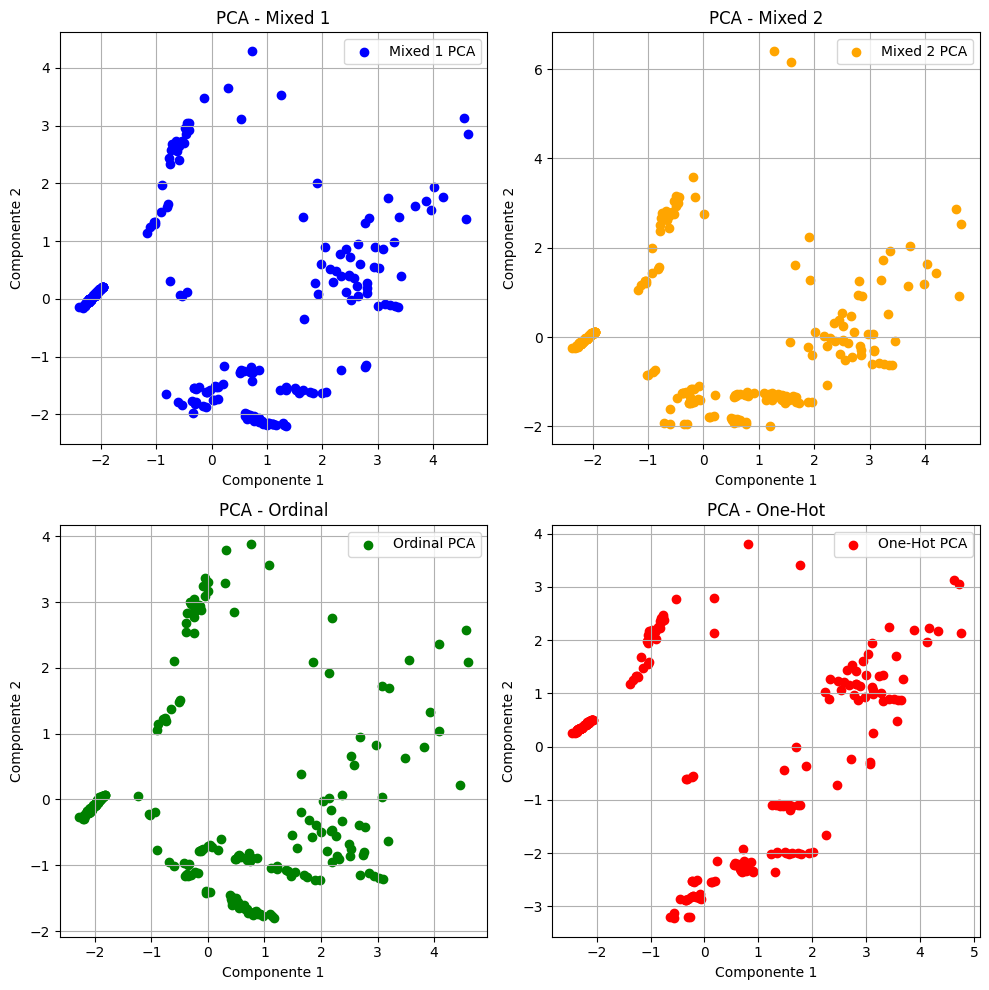

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))  # Crear un grid de 2x2

# Primer gráfico (arriba a la izquierda)
ax[0, 0].scatter(df_mixed_1_pca[:, 0], df_mixed_1_pca[:, 1], c='blue', label='Mixed 1 PCA')
ax[0, 0].set_title('PCA - Mixed 1')
ax[0, 0].set_xlabel('Componente 1')
ax[0, 0].set_ylabel('Componente 2')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Segundo gráfico (arriba a la derecha)
ax[0, 1].scatter(df_mixed_2_pca[:, 0], df_mixed_2_pca[:, 1], c='orange', label='Mixed 2 PCA')
ax[0, 1].set_title('PCA - Mixed 2')
ax[0, 1].set_xlabel('Componente 1')
ax[0, 1].set_ylabel('Componente 2')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Tercer gráfico (abajo a la izquierda)
ax[1, 0].scatter(df_ordinal_pca[:, 0], df_ordinal_pca[:, 1], c='green', label='Ordinal PCA')
ax[1, 0].set_title('PCA - Ordinal')
ax[1, 0].set_xlabel('Componente 1')
ax[1, 0].set_ylabel('Componente 2')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Cuarto gráfico (abajo a la derecha)
ax[1, 1].scatter(df_one_hot_pca[:, 0], df_one_hot_pca[:, 1], c='red', label='One-Hot PCA')
ax[1, 1].set_title('PCA - One-Hot')
ax[1, 1].set_xlabel('Componente 1')
ax[1, 1].set_ylabel('Componente 2')
ax[1, 1].legend()
ax[1, 1].grid(True)


plt.tight_layout()
plt.show()


Ahora todo parece tener más sentido, así que avanzaremos con estos datos.

## Aplicar Algortimo de CLustering


Método Silhouette
El método del codo (Elbow Method) no siempre proporciona un número óptimo de clústeres claro. Una alternativa es el método Silhouette, que utilizamos para nuestro análisis. Este enfoque se basa en dos distancias: la distancia media dentro del clúster (intra-cluster) y la distancia media con el clúster más cercano (inter-cluster). Valores altos indican una mejor separación entre clústeres y mayor cohesión interna.

Los valores de Silhouette oscilan entre -1,0 y 1,0, y la fórmula básica es:

Silhouette Score=
𝑏
−
𝑎
max
⁡
(
𝑎
,
𝑏
)
Silhouette Score= 
max(a,b)
b−a
​
 
donde:

𝑎
a es la distancia media dentro del clúster.
𝑏
b es la distancia media entre clústeres.
Este método proporciona una manera efectiva de evaluar el número óptimo de clústeres para nuestros datos.

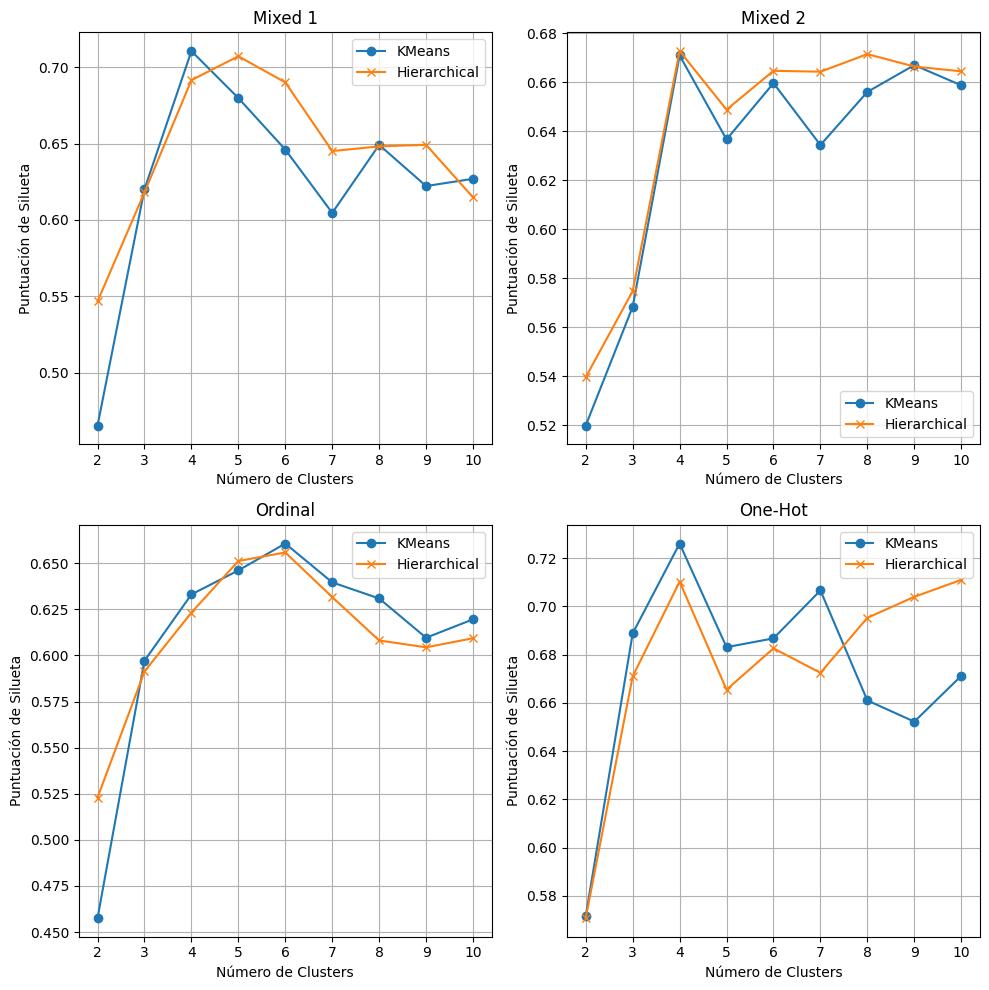

In [68]:
from sklearn.cluster import AgglomerativeClustering

# Rango de número de clusters para probar
k_range = range(2, 11)

def my_silhouette_scores(df):
    silhouette_scores = []
    for k in k_range:
        kmeans = SKLearnKMeans(n_clusters=k, random_state=100472111)
        cluster_labels = kmeans.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

def my_silhouette_score_hierarchical(df):
    silhouette_scores = []
    for k in k_range:
        hierarchical = AgglomerativeClustering(n_clusters=k)
        cluster_labels = hierarchical.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores


# Aplicar la función a los DataFrames
dataframes = [df_mixed_1_pca, df_mixed_2_pca, df_ordinal_pca, df_one_hot_pca]
titles = ["Mixed 1", "Mixed 2", "Ordinal", "One-Hot"]

# Crear un grid de 2x2 para los gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, df, title in zip(axes.flatten(), dataframes, titles):
    # Calcular las puntuaciones de silueta para KMeans y Clustering Jerárquico
    scores_kmeans = my_silhouette_scores(df)
    scores_hierarchical = my_silhouette_score_hierarchical(df)
    
    # Graficar las puntuaciones de silueta
    ax.plot(list(k_range), scores_kmeans, label='KMeans', marker='o')
    ax.plot(list(k_range), scores_hierarchical, label='Hierarchical', marker='x')
    
    # Títulos y etiquetas
    ax.set_title(title)
    ax.set_xlabel("Número de Clusters")
    ax.set_ylabel("Puntuación de Silueta")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


Los resultados indican que el número óptimo de clústeres es 4 para la mayoría de los casos, excepto en el conjunto de datos ordinal, donde el valor óptimo es 6. Vamos a aplicar el clustering y observar cómo se comportan estos valores en cada caso específico para comprender mejor la dinámica de los clústeres.

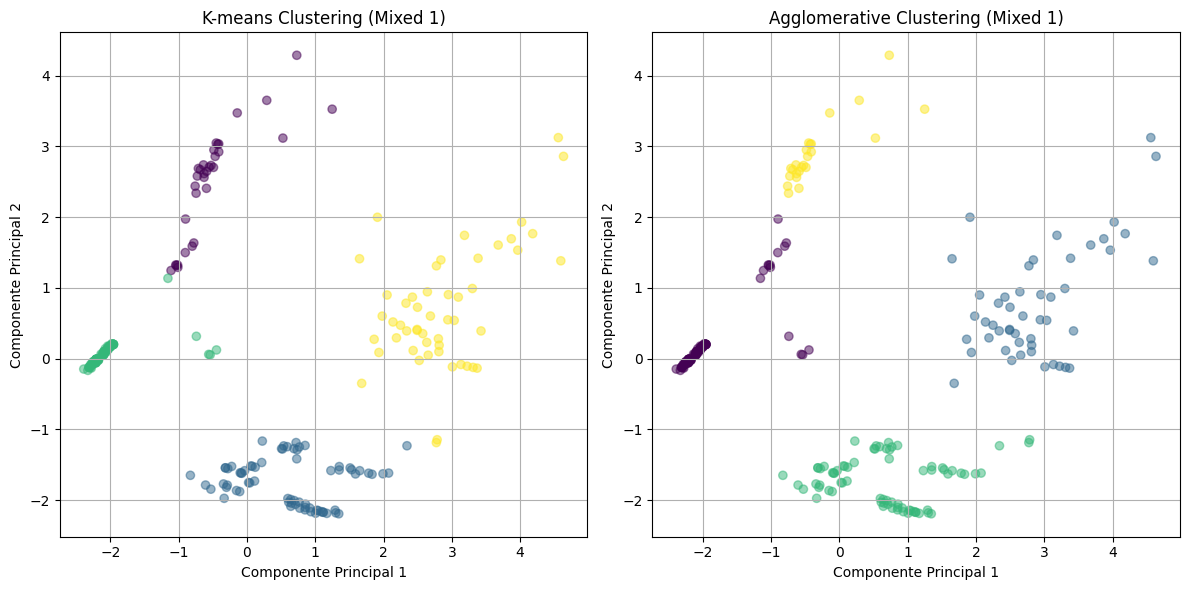

Silhouette Score para K-means (Mixed 1): 0.711
Silhouette Score para Agglomerative Clustering (Mixed 1): 0.692


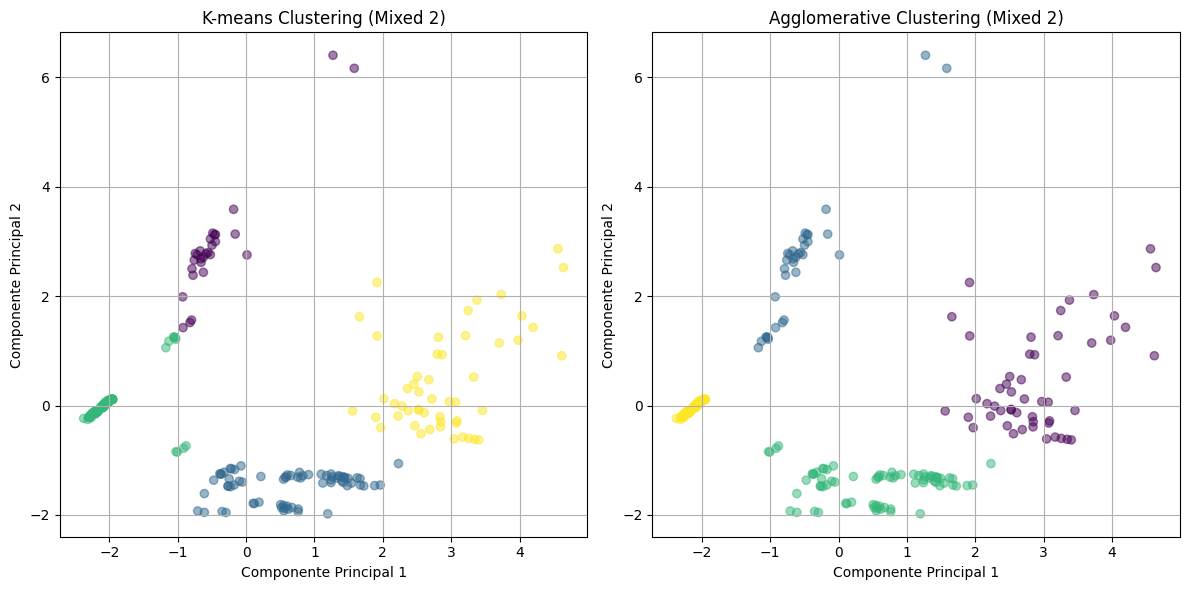

Silhouette Score para K-means (Mixed 2): 0.671
Silhouette Score para Agglomerative Clustering (Mixed 2): 0.673


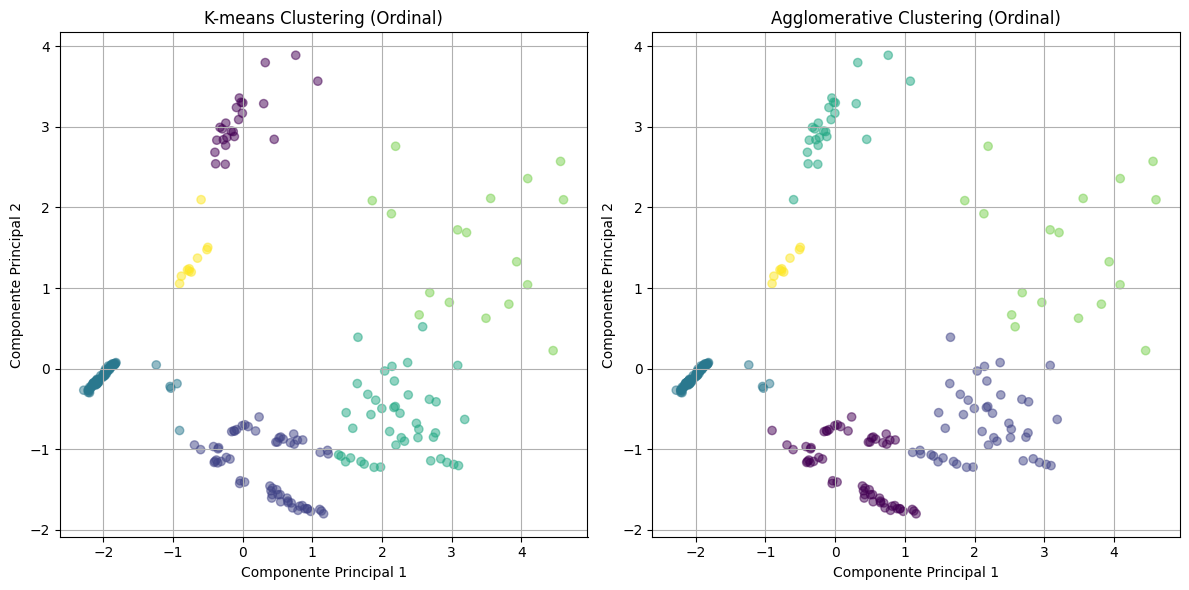

Silhouette Score para K-means (Ordinal): 0.661
Silhouette Score para Agglomerative Clustering (Ordinal): 0.656


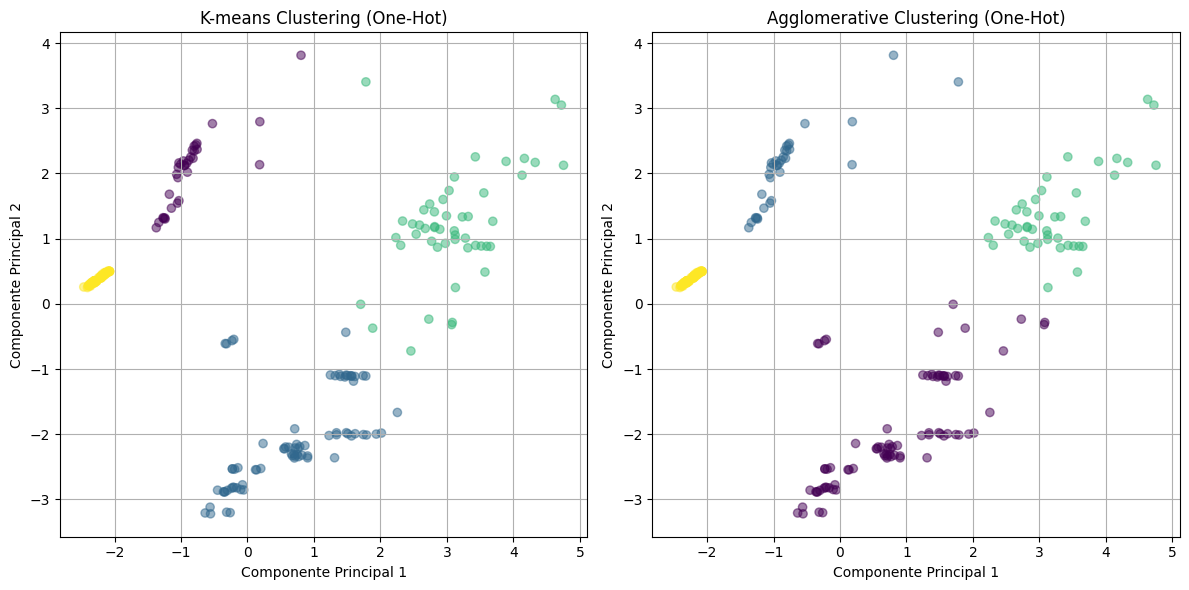

Silhouette Score para K-means (One-Hot): 0.726
Silhouette Score para Agglomerative Clustering (One-Hot): 0.710


In [69]:

# Número de clusters para cada tipo de conjunto de datos
num_clusters = {
    "Ordinal": 6,  # Número de clusters específico para el conjunto ordinal
    "default": 4   # Número de clusters para el resto
}


# Ciclo para aplicar K-means y Agglomerative Clustering a cada DataFrame
for df, title in zip(dataframes, titles):
    # Determinar el número de clusters basándose en el título del conjunto de datos
    n_clusters = num_clusters.get(title, num_clusters["default"])

    
    kmeans = SKLearnKMeans(n_clusters=n_clusters, random_state=100472111)
    kmeans_labels = kmeans.fit_predict(df)
    
    
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agglomerative_labels = agglomerative.fit_predict(df)
    
    
    plt.figure(figsize=(12, 6))  # Crear una figura con dos subgráficos
    
    # Gráfico para K-means
    plt.subplot(1, 2, 1)
    plt.grid(True)
    plt.scatter(df[:, 0], df[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"K-means Clustering ({title})")
    
    # Gráfico para Agglomerative Clustering
    plt.subplot(1, 2, 2)
    plt.grid(True)
    plt.scatter(df[:, 0], df[:, 1], c=agglomerative_labels, cmap='viridis', alpha=0.5)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"Agglomerative Clustering ({title})")

    plt.tight_layout()
    plt.show()

    # Calcular el Silhouette Score para cada método de clustering
    kmeans_silhouette = silhouette_score(df, kmeans_labels)
    agglomerative_silhouette = silhouette_score(df, agglomerative_labels)

    print(f"Silhouette Score para K-means ({title}): {kmeans_silhouette:.3f}")
    print(f"Silhouette Score para Agglomerative Clustering ({title}): {agglomerative_silhouette:.3f}")

Resultados para "Mixed 1"
K-means: Con un Silhouette Score de 0.711, el clustering parece estar bien definido, con una buena separación entre los clusters.
Agglomerative Clustering: El puntaje es 0.692, ligeramente inferior al de K-means, pero aún indica una buena agrupación.
En general, ambos algoritmos muestran un resultado sólido para esta configuración, con K-means apenas superando a Agglomerative Clustering.

Resultados para "Mixed 2"
K-means: El puntaje es de 0.671, sugiriendo que hay cierta superposición entre clusters, pero en general el agrupamiento es aceptable.
Agglomerative Clustering: Con un puntaje de 0.673, Agglomerative Clustering parece funcionar de manera similar a K-means para esta combinación.
En este caso, ambos algoritmos parecen proporcionar resultados comparables en términos de separación de clusters.

Resultados para "Ordinal"
K-means: Con 0.661, este es el puntaje más bajo entre todos, indicando que los clusters están menos definidos.
Agglomerative Clustering: Con un Silhouette Score de 0.656, es ligeramente inferior al de K-means, pero aún relativamente bajo.
Estos resultados sugieren que la codificación ordinal puede tener más dificultades para proporcionar una buena separación entre clusters, independientemente del algoritmo utilizado.

Resultados para "One-Hot"
K-means: Con un puntaje de 0.726, la calidad del clustering es similar a la configuración "Ordinal".
Agglomerative Clustering: Con un Silhouette Score de 0.710, Agglomerative Clustering parece tener una ventaja significativa sobre K-means en esta configuración.
Estos resultados también sugieren que la codificación One-Hot ofrece una mejor separación para Agglomerative Clustering que para K-means.


Silhouette Score: Los resultados para cada configuración indican variabilidad en la calidad del clustering, pero en general, ambos algoritmos parecen generar agrupamientos válidos. Sin embargo, la superioridad de Agglomerative Clustering en algunas combinaciones podría indicar que este algoritmo es más adecuado para ciertos tipos de datos o estructuras de clustering.

## Elecion del dataframe

Tras visualizar los datos, a pesar de haber considerado el método del Silhouette Score, hemos decidido que el dataframe más adecuado para trabajar es el 'dt_ordinal_pca'. Este dataframe ha pasado por varias transformaciones: primero se convirtió el dataframe original ('df') a un formato ordinal ('df_ordinal'), luego se escaló ('df_ordinal_scaled'), después se aplicó un PCA ('df_ordinal_pca'), y finalmente se utilizó el algoritmo K-means para clustering con 6 clústeres y un estado aleatorio de 100451958.

Esta transformación incluyó convertir las variables categóricas "Color" y "Spectral Class" a valores ordinales, reflejando un orden de estrellas desde las más frías hasta las más calientes. Posteriormente, se escaló el dataframe y se aplicó un análisis de componentes principales (PCA). Finalmente, se usó K-means para el clustering, que resultó en un Silhouette Score adecuado.

Hemos elegido este dataframe debido a que su configuración ordinal coincide con el número de clústeres que se usa comúnmente en la literatura científica, y porque convertir las variables categóricas a un formato ordinal es la mejor manera de mantener la información original. En las próximas secciones, entraremos en más detalles sobre las razones detrás de esta elección y explicaremos cómo se relaciona con los resultados obtenidos.

## Hay similitudes?

| Clase                     | Temperatura | L           | R             | A_M   | Color         | Clase Espectral |
|---------------------------|-------------|-------------|---------------|-------|---------------|-----------------|
| Enana roja                | 3.000       | 7,0∙10^-4   | 1,0∙10^-1     | +17.5 | rojo          | K-M             |
| Enana marrón              | 3.300       | 5,5∙10^-3   | 3,5∙10^-1     | +12.5 | rojo          | M               |
| Enana blanca              | 14.000      | 2,5∙10^-3   | 1,0∙10^-2     | +12.6 | blanca        | B-G             |
| Estrella en secuencia     | 16.000      | 3.2∙10^4    | 4,4           | -0.4  | blancaamarilla| B-M             |
| Super gigante             | 15.000      | 3.0∙10^5    | 5,0∙10^1      | -6.4  | blancaamarilla| B-M             |
| Hiper gigante             | 11.000      | 3.0∙10^5    | 1,4∙10^3      | -9.6  | amarilla      | B-M             |



Para analizar las seis clases de estrellas, sería ideal visualizar los resultados mediante gráficos para evaluar la consistencia de nuestros modelos. No obstante, esto requeriría recalcular el PCA, lo que implicaría un procesamiento adicional y la conversión de datos categóricos, algo que no está en nuestro plan actual. Por lo tanto, describiremos los resultados basándonos en la tabla que tenemos.

Primero, obtendremos los índices de las estrellas que pertenecen a cada clúster. Luego, volveremos al dataframe original, 'df_ordinal', para agregar una nueva columna que contenga las etiquetas de los clústeres correspondientes. Finalmente, calcularemos el promedio de cada columna para poder comparar estos resultados con la tabla inicial y confirmar la consistencia entre ambos enfoques.

In [70]:
# Paso 1: Aplicar KMeans con 6 clusters
n_clusters = 6
kmeans = SKLearnKMeans(n_clusters=n_clusters, random_state=100472111)
cluster_labels = kmeans.fit_predict(df_ordinal_pca)

# Paso 2: Crear un diccionario para agrupar índices por cluster
cluster_indices = {i: [] for i in range(n_clusters)}

# Paso 3: Asignar los índices a cada cluster
for index, label in enumerate(cluster_labels):
    cluster_indices[label].append(index)

# Imprimir los índices por cluster
for cluster, indices in cluster_indices.items():
    print(f"Índices en el cluster {cluster}: {indices}")
    


Índices en el cluster 0: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 110, 111, 112, 113, 114, 115, 116, 118, 119, 170, 171, 172, 174, 175]
Índices en el cluster 1: [20, 21, 22, 23, 24, 25, 26, 27, 28, 32, 33, 34, 35, 36, 37, 38, 39, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 94, 95, 97, 98, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 158, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 216, 218, 219]
Índices en el cluster 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 29, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 91, 92, 93, 96, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Índices en el cluster 3: [30, 31, 49, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 150, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17

In [71]:
# Añadir etiquetas de cluster al DataFrame original
df_ordinal['Cluster'] = cluster_labels

# Agrupar por cluster y calcular el promedio de cada columna
df_avg_per_cluster = df_ordinal.groupby('Cluster').mean()

# Mostrar el promedio para cada cluster en el DataFrame original
print("Promedio por cluster:")
print(df_avg_per_cluster)

Promedio por cluster:
          Temperature              L            R        A_M     Color  \
Cluster                                                                  
0         3782.375000  245541.666667  1391.875000  -9.916250  0.166667   
1        12608.901639     136.169234     1.274346   8.322934  8.409836   
2         3261.129412       0.017283     0.258887  14.593094  0.188235   
3        21516.581395  212307.395349    53.514581  -5.592488  9.767442   
4        24846.705882  507569.470588  1165.705882  -8.817059  9.235294   
5         3466.800000  206600.000000   129.500000  -6.798000  0.000000   

         Spectral_Class  
Cluster                  
0              0.166667  
1              4.196721  
2              0.082353  
3              5.720930  
4              5.411765  
5              0.000000  



Recordemos que las variables categóricas han sido transformadas a valores ordinales siguiendo este orden:
color_order = ["Red", "Orange-Red", "Orange", "Pale yellow orange", 
               "Yellowish", "Yellowish White", "White", 
               "Whitish", "White-Yellow", "Blue-White", "Blue"]

spectral_class_order = ['M', 'K', 'G', 'F', 'A', 'B', 'O']

| Clase                     | Temperatura | L           | R             | A_M   | Color         | Clase Espectral |
|---------------------------|-------------|-------------|---------------|-------|---------------|-----------------|
| Enana roja                | 3.000       | 7,0∙10^-4   | 1,0∙10^-1     | +17.5 | rojo          | K-M             |
| Enana marrón              | 3.300       | 5,5∙10^-3   | 3,5∙10^-1     | +12.5 | rojo          | M               |
| Enana blanca              | 14.000      | 2,5∙10^-3   | 1,0∙10^-2     | +12.6 | blanca        | B-G             |
| Estrella en secuencia     | 16.000      | 3.2∙10^4    | 4,4           | -0.4  | blancaamarilla| B-M             |
| Super gigante             | 15.000      | 3.0∙10^5    | 5,0∙10^1      | -6.4  | blancaamarilla| B-M             |
| Hiper gigante             | 11.000      | 3.0∙10^5    | 1,4∙10^3      | -9.6  | amarilla      | B-M             |


### Analisis final


Un análisis inicial positivo es que tanto nuestros resultados como los proporcionados por los científicos coinciden en que el número óptimo de clústeres es 6.

Al examinar nuestros resultados, observamos que los clústeres 0, 2 y 5 tienen similitudes con las enanas roja y marrón en términos de temperatura, clase espectral y color. Sin embargo, los valores de luminosidad (L), radio (R) y magnitud absoluta (A_M) están muy lejos de los esperados para esas clases de estrellas. Por otro lado, los clústeres 1, 3 y 4 muestran valores altos de temperatura y un color blanco-amarillo, lo que coincide con las estrellas de secuencia principal o supergigantes. También presentan valores de luminosidad y radio que tienen cierta similitud con estas clases.

Aunque el número de clústeres coincide, no tiene mucho sentido comparar los resultados directamente, ya que las diferencias entre nuestro análisis y el proporcionado por los científicos son notables. Esto puede deberse a dos razones principales. Primero, el PCA que utilizamos (una combinación lineal de todas las columnas iniciales) podría estar asignando un peso nulo a ciertos parámetros, lo que los excluye del proceso de clustering. Otra posible razón es que los científicos que nos dieron la tabla pueden estar utilizando otras variables o parámetros que no están disponibles en nuestro conjunto de datos.

Por estas razones, debemos ser cautelosos al interpretar los resultados del clustering y tener en cuenta que otros factores pueden estar influyendo en la clasificación de las estrellas en el análisis científico.